# 데이터프레임 준비

In [1]:
import os
import pandas as pd

csv_path = r"D:\089.차량 내 탑승자 상황 인식 영상 데이터\01.데이터\1.Training\ms_project1\코드\new_TL_merged.csv"

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(df.head())
else:
    print("❌ 파일을 찾을 수 없습니다. 경로를 다시 확인하세요.")


                  json_file   folder         scene_id category_name      date  \
0  SGA2100392S0169_new.json  new_TL2  SGA2100392S0169          졸음운전  20211119   
1  SGA2100392S0169_new.json  new_TL2  SGA2100392S0169          졸음운전  20211119   
2  SGA2100392S0169_new.json  new_TL2  SGA2100392S0169          졸음운전  20211119   
3  SGA2100392S0169_new.json  new_TL2  SGA2100392S0169          졸음운전  20211119   
4  SGA2100392S0169_new.json  new_TL2  SGA2100392S0169          졸음운전  20211119   

  occupant_id occupant_sex occupant_age occupant_position  \
0   occupant1            M          30대           Unknown   
1   occupant1            M          30대           Unknown   
2   occupant1            M          30대           Unknown   
3   occupant1            M          30대           Unknown   
4   occupant1            M          30대           Unknown   

                     img_name  action emotion  body_b_box_x  body_b_box_y  \
0  SGA2100392S0169IMG0001.jpg  꾸벅꾸벅졸다      중립    447.368421    234.86

In [2]:
new_df = df[['folder', 'img_name', 'action']]
new_df.head(10)

,folder,img_name,action
0,new_TL2,SGA2100392S0169IMG0001.jpg,꾸벅꾸벅졸다
1,new_TL2,SGA2100392S0169IMG0002.jpg,꾸벅꾸벅졸다
2,new_TL2,SGA2100392S0169IMG0003.jpg,팔주무르기
3,new_TL2,SGA2100392S0169IMG0004.jpg,팔주무르기
4,new_TL2,SGA2100392S0169IMG0005.jpg,팔주무르기
5,new_TL2,SGA2100493S0064IMG0001.jpg,운전하다
6,new_TL2,SGA2100493S0064IMG0002.jpg,몸못가누기
7,new_TL2,SGA2100493S0064IMG0003.jpg,몸못가누기
8,new_TL2,SGA2100493S0064IMG0004.jpg,몸못가누기
9,new_TL2,SGA2100493S0064IMG0005.jpg,몸못가누기


In [3]:
new_TL1_df = new_df[new_df['folder'] == 'new_TL3']

new_TL1_df.head(5)

,folder,img_name,action
1168535,new_TL3,SGA2100762S1468IMG0001.jpg,운전하다
1168536,new_TL3,SGA2100762S1468IMG0002.jpg,몸을돌리다
1168537,new_TL3,SGA2100762S1468IMG0003.jpg,몸을돌리다
1168538,new_TL3,SGA2100762S1468IMG0004.jpg,몸을돌리다
1168539,new_TL3,SGA2100762S1468IMG0005.jpg,몸을돌리다


In [4]:
folder_counts = new_TL1_df['folder'].value_counts()
action_counts = new_TL1_df['action'].value_counts()
folder_counts


folder
new_TL3    271375
Name: count, dtype: int64

In [5]:
action_counts

action
꾸벅꾸벅졸다        42756
운전하다          33685
무언가를보다        27738
몸못가누기         21193
허리굽히다         14011
고개를돌리다        13860
핸들을흔들다        13196
무언가를마시다       10324
몸을돌리다          9764
핸드폰귀에대기        9395
핸들을놓치다         7813
손을뻗다           6932
핸드폰쥐기          5757
힐끗거리다          5423
고개를좌우로흔들다      4836
하품             4506
눈깜빡이기          4315
목을만지다          4061
눈비비기           3897
어깨를두드리다        3827
팔주무르기          3536
뺨을때리다          3459
박수치다           3313
중앙을쳐다보다        3150
중앙으로손을뻗다       2569
창문을열다          2545
허벅지두드리기        2072
무언가를쥐다         1953
옆으로기대다         1479
운전자를향해발을뻗다       10
Name: count, dtype: int64

In [6]:
# 5000개씩 남길 action 리스트
selected_actions = [
    '하품','몸못가누기','꾸벅꾸벅졸다','뺨을때리다','눈비비기','운전하다',
    '목을만지다','어깨를두드리다',
    ]

# 해당 action 값만 필터링하고 1000개씩 샘플링 (데이터가 부족하면 전체 유지)
filtered_df = (
    new_TL1_df[new_TL1_df['action'].isin(selected_actions)]
    .groupby('action', group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), 250), random_state=42))
    .reset_index(drop=True)
)

# 결과 데이터 확인
print(filtered_df.head())


    folder                    img_name  action
0  new_TL3  SGA2100722S0058IMG0003.jpg  꾸벅꾸벅졸다
1  new_TL3  SGA2100602S0262IMG0001.jpg  꾸벅꾸벅졸다
2  new_TL3  SGA2100604S0183IMG0003.jpg  꾸벅꾸벅졸다
3  new_TL3  SGA2100601S0070IMG0001.jpg  꾸벅꾸벅졸다
4  new_TL3  SGA2100707S0340IMG0003.jpg  꾸벅꾸벅졸다


C:\Users\User\AppData\Local\Temp\ipykernel_33564\376418180.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), 250), random_state=42))


In [7]:
# 5000개씩 남길 action 리스트
selected_actions = [
    '하품','몸못가누기','꾸벅꾸벅졸다','뺨을때리다','눈비비기','운전하다','목을만지다','어깨를두드리다'
    
]

# 해당 action 값만 필터링하고 5000개씩 샘플링
filtered_df = (
    new_TL1_df[new_TL1_df['action'].isin(selected_actions)]
    .groupby('action', group_keys=False)
    .apply(lambda x: x.sample(n=250, random_state=42) if len(x) > 250 else x)
    .reset_index(drop=True)
)

# 결과 데이터 확인
print(filtered_df.head())

    folder                    img_name  action
0  new_TL3  SGA2100722S0058IMG0003.jpg  꾸벅꾸벅졸다
1  new_TL3  SGA2100602S0262IMG0001.jpg  꾸벅꾸벅졸다
2  new_TL3  SGA2100604S0183IMG0003.jpg  꾸벅꾸벅졸다
3  new_TL3  SGA2100601S0070IMG0001.jpg  꾸벅꾸벅졸다
4  new_TL3  SGA2100707S0340IMG0003.jpg  꾸벅꾸벅졸다


C:\Users\User\AppData\Local\Temp\ipykernel_33564\3240828672.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=250, random_state=42) if len(x) > 250 else x)


In [8]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   folder    2000 non-null   object
 1   img_name  2000 non-null   object
 2   action    2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [9]:
new_action_counts = filtered_df['action'].value_counts()
new_action_counts


action
꾸벅꾸벅졸다     250
눈비비기       250
목을만지다      250
몸못가누기      250
뺨을때리다      250
어깨를두드리다    250
운전하다       250
하품         250
Name: count, dtype: int64

In [10]:
filtered_df.head(5)

,folder,img_name,action
0,new_TL3,SGA2100722S0058IMG0003.jpg,꾸벅꾸벅졸다
1,new_TL3,SGA2100602S0262IMG0001.jpg,꾸벅꾸벅졸다
2,new_TL3,SGA2100604S0183IMG0003.jpg,꾸벅꾸벅졸다
3,new_TL3,SGA2100601S0070IMG0001.jpg,꾸벅꾸벅졸다
4,new_TL3,SGA2100707S0340IMG0003.jpg,꾸벅꾸벅졸다


# 이미지 데이터 준비

In [11]:
import os
import shutil
import pandas as pd

# 데이터프레임 (filtered_df) 가정
# filtered_df = pd.read_csv("your_filtered_df.csv")  # 필요 시 CSV에서 로드

# 원본 폴더 및 복사할 폴더 경로
source_folder = r"D:\089.차량 내 탑승자 상황 인식 영상 데이터\01.데이터\1.Training\원천데이터\abnormal_230303_add\new_TS3"
target_folder = "./data/원천데이터/abnormal_230303_add/250_new_TS3"

# 대상 폴더가 없으면 생성
os.makedirs(target_folder, exist_ok=True)

# 복사할 파일 리스트
image_names = set(filtered_df['img_name'])  # 중복 제거
copied_count = 0

for img_name in image_names:
    source_path = os.path.join(source_folder, img_name)
    target_path = os.path.join(target_folder, img_name)
    
    if os.path.exists(source_path):  # 파일 존재 여부 확인
        shutil.copy2(source_path, target_path)
        copied_count += 1
        print(f"[✓] Copied: {img_name}")
    else:
        print(f"[⚠] File not found: {img_name}")

print(f"\n[✓] 총 {copied_count}개의 파일이 복사 완료되었습니다!")


[✓] Copied: SGA2100713S0113IMG0005.jpg
[✓] Copied: SGA2100610S0381IMG0002.jpg
[✓] Copied: SGA2100638S0228IMG0004.jpg
[✓] Copied: SGA2100635S0041IMG0005.jpg
[✓] Copied: SGA2100588S0125IMG0004.jpg
[✓] Copied: SGA2100612S0066IMG0001.jpg
[✓] Copied: SGA2100667S1211IMG0002.jpg
[✓] Copied: SGA2100596S0076IMG0001.jpg
[✓] Copied: SGA2100738S0252IMG0003.jpg
[✓] Copied: SGA2100742S0258IMG0003.jpg
[✓] Copied: SGA2100663S0064IMG0004.jpg
[✓] Copied: SGA2100635S0152IMG0005.jpg
[✓] Copied: SGA2100666S0101IMG0005.jpg
[✓] Copied: SGA2100658S0064IMG0005.jpg
[✓] Copied: SGA2100658S0040IMG0005.jpg
[✓] Copied: SGA2100597S0255IMG0005.jpg
[✓] Copied: SGA2100598S0100IMG0003.jpg
[✓] Copied: SGA2100570S0413IMG0005.jpg
[✓] Copied: SGA2100614S0414IMG0002.jpg
[✓] Copied: SGA2100581S0009IMG0003.jpg
[✓] Copied: SGA2100668S1171IMG0003.jpg
[✓] Copied: SGA2100635S0011IMG0004.jpg
[✓] Copied: SGA2100597S0513IMG0002.jpg
[✓] Copied: SGA2100746S0125IMG0003.jpg
[✓] Copied: SGA2100752S0061IMG0005.jpg
[✓] Copied: SGA2100755S03

# 클래스화

In [12]:

import os
import shutil

# 원본 이미지 폴더 및 대상 폴더 설정
source_folder = r'D:\089.차량 내 탑승자 상황 인식 영상 데이터\01.데이터\1.Training\ms_project1\코드\data\원천데이터\abnormal_230303_add\250_new_TS3'

target_base_folder = r'./data/원천데이터/abnormal_230303_add/class_250_new_TS3'

# 대상 폴더 생성 (클래스별 폴더)
for action in filtered_df['action'].unique():
    action_folder = os.path.join(target_base_folder, action)
    os.makedirs(action_folder, exist_ok=True)

# 존재하는 파일만 복사
copied_count = 0
missing_files = 0

for index, row in filtered_df.iterrows():
    source_path = os.path.join(source_folder, row['img_name'])
    target_folder = os.path.join(target_base_folder, row['action'])
    target_path = os.path.join(target_folder, row['img_name'])

    if os.path.exists(source_path):  # 🔹 파일 존재 여부 확인
        shutil.copy2(source_path, target_path)
        copied_count += 1
    else:
        missing_files += 1

print(f"\n[✓] 총 {copied_count}개의 파일이 class 폴더에 복사 완료되었습니다!")
print(f"[⚠] 총 {missing_files}개의 파일이 원본 폴더에 존재하지 않습니다.")



[✓] 총 2000개의 파일이 class 폴더에 복사 완료되었습니다!
[⚠] 총 0개의 파일이 원본 폴더에 존재하지 않습니다.


In [2]:
pip install azure-cognitiveservices-vision-customvision



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import os
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from PIL import Image



# === 설정 ===


PREDICTION_KEY = "EAqbiKHt9sYSwFiO7U1NUBngdvnBoJRmd3ZLl0V0XzKkBbzibzPoJQQJ99BBACYeBjFXJ3w3AAAIACOGYNGQ"
PREDICTION_ENDPOINT = "https://6b034cv20250210-prediction.cognitiveservices.azure.com/"
PROJECT_ID = "5cd011c1-e369-47fd-9059-65cc46239b97"
ITERATION_NAME = "Iteration1"
 

# 입력 및 출력 폴더 경로
INPUT_FOLDER = r"D:\089.차량 내 탑승자 상황 인식 영상 데이터\01.데이터\1.Training\ms_project1\코드\data\원천데이터\abnormal_230303_add\class_250_new_TS3"
OUTPUT_FOLDER = "./data/원천데이터/abnormal_230303_add/class_250_new_TS3_crop"

# 출력 폴더 생성 (없으면 생성)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# === Azure Custom Vision 예측 클라이언트 설정 ===
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(PREDICTION_ENDPOINT, credentials)

def detect_and_crop_body(image_path, output_folder, threshold=0.5):
    """
    모델을 사용하여 'body' 태그만 감지하고, 크롭하여 저장하는 함수
    """
    with open(image_path, "rb") as image_data:
        results = predictor.detect_image(PROJECT_ID, ITERATION_NAME, image_data)

    # 원본 이미지 로드
    img = Image.open(image_path)
    width, height = img.size

    # 감지된 객체 중 'body'만 크롭
    for prediction in results.predictions:
        if prediction.probability >= threshold and prediction.tag_name == "Body":
            # 바운딩 박스 좌표 변환
            left = int(prediction.bounding_box.left * width)
            top = int(prediction.bounding_box.top * height)
            box_width = int(prediction.bounding_box.width * width)
            box_height = int(prediction.bounding_box.height * height)
            crop_box = (left, top, left + box_width, top + box_height)

            cropped_img = img.crop(crop_box)

            # 원본 파일명 유지
            output_filename = os.path.basename(image_path)  # ex) "image1.jpg"
            output_path = os.path.join(output_folder, output_filename)
            cropped_img.save(output_path)

            print(f"[✓] Cropped body saved to: {output_path}")
            return  # 첫 번째 'body'만 저장하고 종료

def process_images(input_folder, output_folder, threshold=0.5):
    """
    입력 폴더 내 모든 이미지를 처리하는 함수
    """
    for filename in os.listdir(input_folder):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(input_folder, filename)
            print(f"[*] Processing: {image_path}")
            detect_and_crop_body(image_path, output_folder, threshold)

# === 실행 ===
process_images(INPUT_FOLDER, OUTPUT_FOLDER, threshold=0.9)
print("[✓] 모든 'body' 크롭 이미지 처리가 완료되었습니다.")


[✓] 모든 'body' 크롭 이미지 처리가 완료되었습니다.


In [4]:
import os
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from PIL import Image

# === 설정 ===


PREDICTION_KEY = "EAqbiKHt9sYSwFiO7U1NUBngdvnBoJRmd3ZLl0V0XzKkBbzibzPoJQQJ99BBACYeBjFXJ3w3AAAIACOGYNGQ"
PREDICTION_ENDPOINT = "https://6b034cv20250210-prediction.cognitiveservices.azure.com/"
PROJECT_ID = "5cd011c1-e369-47fd-9059-65cc46239b97"
ITERATION_NAME = "Iteration1"
 

# 입력 및 출력 폴더 경로
INPUT_FOLDER = "./data/원천데이터/abnormal_230303_add/class_100_new_TS3/하품"
OUTPUT_FOLDER = "./data/원천데이터/abnormal_230303_add/class_100_new_TS3_crop/하품"

# 출력 폴더 생성 (없으면 생성)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# === Azure Custom Vision 예측 클라이언트 설정 ===
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(PREDICTION_ENDPOINT, credentials)

def detect_and_crop_body(image_path, output_folder, threshold=0.5):
    """
    모델을 사용하여 'body' 태그만 감지하고, 크롭하여 저장하는 함수
    """
    with open(image_path, "rb") as image_data:
        results = predictor.detect_image(PROJECT_ID, ITERATION_NAME, image_data)

    # 원본 이미지 로드
    img = Image.open(image_path)
    width, height = img.size

    # 감지된 객체 중 'body'만 크롭
    for prediction in results.predictions:
        if prediction.probability >= threshold and prediction.tag_name == "Body":
            # 바운딩 박스 좌표 변환
            left = int(prediction.bounding_box.left * width)
            top = int(prediction.bounding_box.top * height)
            box_width = int(prediction.bounding_box.width * width)
            box_height = int(prediction.bounding_box.height * height)
            crop_box = (left, top, left + box_width, top + box_height)

            cropped_img = img.crop(crop_box)

            # 원본 파일명 유지
            output_filename = os.path.basename(image_path)  # ex) "image1.jpg"
            output_path = os.path.join(output_folder, output_filename)
            cropped_img.save(output_path)

            print(f"[✓] Cropped body saved to: {output_path}")
            return  # 첫 번째 'body'만 저장하고 종료

def process_images(input_folder, output_folder, threshold=0.5):
    """
    입력 폴더 내 모든 이미지를 처리하는 함수
    """
    for filename in os.listdir(input_folder):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(input_folder, filename)
            print(f"[*] Processing: {image_path}")
            detect_and_crop_body(image_path, output_folder, threshold)

# === 실행 ===
process_images(INPUT_FOLDER, OUTPUT_FOLDER, threshold=0.9)
print("[✓] 모든 'body' 크롭 이미지 처리가 완료되었습니다.")


[*] Processing: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3/하품\SGA2100568S0010IMG0004.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3_crop/하품\SGA2100568S0010IMG0004.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3/하품\SGA2100568S0015IMG0003.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3_crop/하품\SGA2100568S0015IMG0003.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3/하품\SGA2100568S0024IMG0005.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3_crop/하품\SGA2100568S0024IMG0005.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3/하품\SGA2100568S0027IMG0004.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3_crop/하품\SGA2100568S0027IMG0004.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_100_new_TS3/하품\SGA2100568S0028IMG0005.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/cla

In [14]:
import os
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from PIL import Image

# === 설정 ===
PREDICTION_KEY = "EAqbiKHt9sYSwFiO7U1NUBngdvnBoJRmd3ZLl0V0XzKkBbzibzPoJQQJ99BBACYeBjFXJ3w3AAAIACOGYNGQ"
PREDICTION_ENDPOINT = "https://6b034cv20250210-prediction.cognitiveservices.azure.com/"
PROJECT_ID = "5cd011c1-e369-47fd-9059-65cc46239b97"
ITERATION_NAME = "Iteration1"

# === Azure Custom Vision 예측 클라이언트 설정 ===
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(PREDICTION_ENDPOINT, credentials)

def detect_and_crop_body(image_path, output_folder, threshold=0.5):
    """
    모델을 사용하여 'body' 태그만 감지하고, 크롭하여 저장하는 함수
    """
    with open(image_path, "rb") as image_data:
        results = predictor.detect_image(PROJECT_ID, ITERATION_NAME, image_data)

    # 원본 이미지 로드
    img = Image.open(image_path)
    width, height = img.size

    # 감지된 객체 중 'body'만 크롭
    for prediction in results.predictions:
        if prediction.probability >= threshold and prediction.tag_name == "Body":
            # 바운딩 박스 좌표 변환
            left = int(prediction.bounding_box.left * width)
            top = int(prediction.bounding_box.top * height)
            box_width = int(prediction.bounding_box.width * width)
            box_height = int(prediction.bounding_box.height * height)
            crop_box = (left, top, left + box_width, top + box_height)

            cropped_img = img.crop(crop_box)

            # 원본 파일명 유지
            output_filename = os.path.basename(image_path)  # ex) "image1.jpg"
            output_path = os.path.join(output_folder, output_filename)
            cropped_img.save(output_path)

            print(f"[✓] Cropped body saved to: {output_path}")
            return  # 첫 번째 'body'만 저장하고 종료

def process_images(input_folder, output_folder, threshold=0.5):
    """
    입력 폴더 내 모든 이미지를 처리하는 함수
    """
    os.makedirs(output_folder, exist_ok=True)  # 출력 폴더 생성
    for filename in os.listdir(input_folder):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(input_folder, filename)
            print(f"[*] Processing: {image_path}")
            detect_and_crop_body(image_path, output_folder, threshold)

def process_all_images(categories, base_input_path, base_output_path, threshold=0.9):
    """
    여러 개의 카테고리에 대해 이미지 크롭을 실행하는 함수
    """
    for category in categories:
        input_folder = os.path.join(base_input_path, category)
        output_folder = os.path.join(base_output_path, category)
        print(f"\n[★] Processing category: {category}")
        process_images(input_folder, output_folder, threshold)
        print(f"[✓] {category} 처리 완료")

# === 실행 ===
CATEGORIES = [
        '하품','몸못가누기','꾸벅꾸벅졸다','뺨을때리다','눈비비기','운전하다','목을만지다','어깨를두드리다'
]
BASE_INPUT_PATH = "./data/원천데이터/abnormal_230303_add/class_250_new_TS3"
BASE_OUTPUT_PATH = "./data/원천데이터/abnormal_230303_add/class_250_new_TS3_crop"

process_all_images(CATEGORIES, BASE_INPUT_PATH, BASE_OUTPUT_PATH, threshold=0.9)

print("[✓] 모든 카테고리의 'body' 크롭 이미지 처리가 완료되었습니다.")


[★] Processing category: 하품
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3\하품\SGA2100568S0010IMG0004.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3_crop\하품\SGA2100568S0010IMG0004.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3\하품\SGA2100568S0027IMG0004.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3_crop\하품\SGA2100568S0027IMG0004.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3\하품\SGA2100569S0151IMG0005.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3_crop\하품\SGA2100569S0151IMG0005.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3\하품\SGA2100570S0030IMG0001.jpg
[✓] Cropped body saved to: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3_crop\하품\SGA2100570S0030IMG0001.jpg
[*] Processing: ./data/원천데이터/abnormal_230303_add/class_250_new_TS3\하품\SGA2100570S0032IMG0001.jpg
[✓] Cropped body saved to: ./data/

### confusion matrix 출력

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44984 (\N{HANGUL SYLLABLE GGU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48261 (\N{HANGUL SYLLABLE BEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45576 (\N{HANGUL SYLLABLE NUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\U

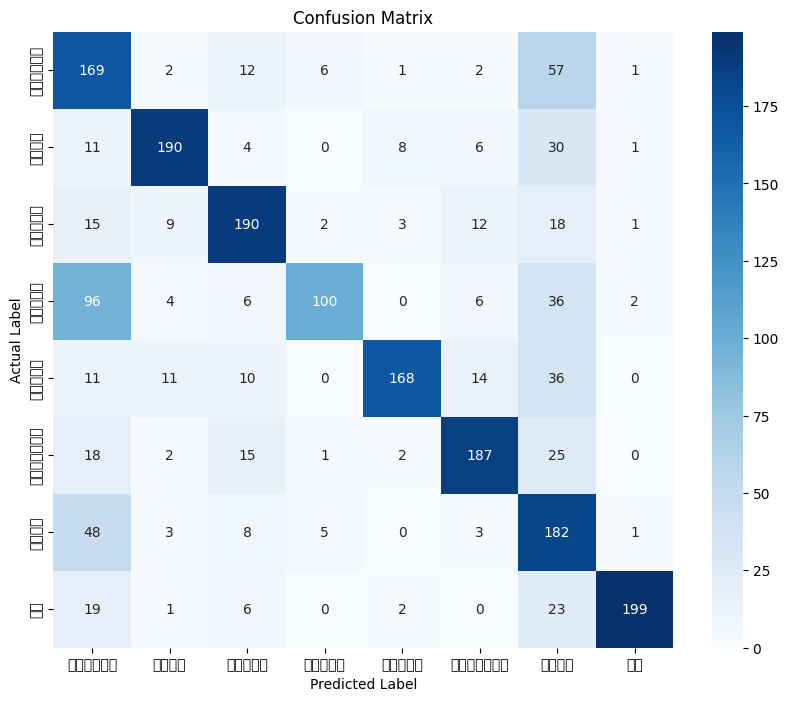


Classification Report:
               precision    recall  f1-score   support

      꾸벅꾸벅졸다       0.44      0.68      0.53       250
        눈비비기       0.86      0.76      0.81       250
       목을만지다       0.76      0.76      0.76       250
       몸못가누기       0.88      0.40      0.55       250
       뺨을때리다       0.91      0.67      0.77       250
     어깨를두드리다       0.81      0.75      0.78       250
        운전하다       0.45      0.73      0.55       250
          하품       0.97      0.80      0.87       250

    accuracy                           0.69      2000
   macro avg       0.76      0.69      0.70      2000
weighted avg       0.76      0.69      0.70      2000



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials

# Custom Vision API 설정
ENDPOINT = "https://6b003cv20250210-prediction.cognitiveservices.azure.com/"
PREDICTION_KEY = "8ypy2B3ZECnRG0PaYKzpSNvOz8yAhfF7MY2z2wQxSzkweNlhgI4SJQQJ99BBACYeBjFXJ3w3AAAIACOG0WmE"
PROJECT_ID = "03fa2862-cb54-4344-b484-630379edffaa"
MODEL_NAME = "Iteration4"

# Custom Vision 클라이언트 설정
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(ENDPOINT, credentials)

# 테스트 이미지가 저장된 최상위 폴더 경로
TEST_ROOT_FOLDER = r"D:\089.차량 내 탑승자 상황 인식 영상 데이터\01.데이터\1.Training\ms_project1\코드\data\원천데이터\abnormal_230303_add\class_250_new_TS3_crop"  # 9개의 행동 폴더가 있는 상위 폴더

# 실제 라벨 및 예측 라벨 저장 리스트
actual_labels = []
predicted_labels = []

# 9개 폴더 순회 (각 폴더가 행동 클래스)
for class_folder in sorted(os.listdir(TEST_ROOT_FOLDER)):
    class_path = os.path.join(TEST_ROOT_FOLDER, class_folder)
    
    # 폴더인지 확인
    if not os.path.isdir(class_path):
        continue
    
    # 현재 폴더명을 Ground Truth로 설정
    actual_class = class_folder  # 폴더 이름이 실제 라벨

    # 폴더 내 250개 이미지 가져오기
    image_files = [f for f in os.listdir(class_path) if f.endswith((".jpg", ".png"))][:250]

    for img_name in image_files:
        img_path = os.path.join(class_path, img_name)

        # 실제 라벨 추가
        actual_labels.append(actual_class)

        # Custom Vision 예측 실행
        with open(img_path, "rb") as image_data:
            results = predictor.classify_image(PROJECT_ID, MODEL_NAME, image_data)

        # 가장 높은 확률을 가진 예측값 가져오기
        top_prediction = max(results.predictions, key=lambda p: p.probability)
        predicted_labels.append(top_prediction.tag_name)

# 클래스 목록 (폴더 이름 기준)
classes = sorted(set(actual_labels))

# 혼동 행렬 생성
cm = confusion_matrix(actual_labels, predicted_labels, labels=classes)

# 혼동 행렬 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:\n", classification_report(actual_labels, predicted_labels, target_names=classes))


In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우, 맥, 리눅스에서 자동 적용)
def set_korean_font():
    import platform
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')  # 윈도우
    elif platform.system() == 'Darwin':  # MacOS
        plt.rc('font', family='AppleGothic')
    else:
        plt.rc('font', family='NanumGothic')  # 리눅스

    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 한글 폰트 적용
set_korean_font()


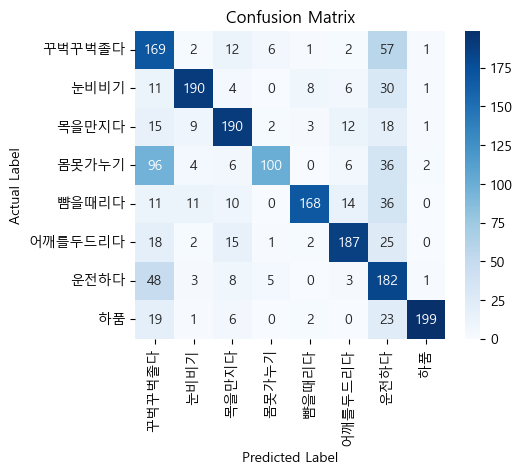


Classification Report:
               precision    recall  f1-score   support

      꾸벅꾸벅졸다       0.44      0.68      0.53       250
        눈비비기       0.86      0.76      0.81       250
       목을만지다       0.76      0.76      0.76       250
       몸못가누기       0.88      0.40      0.55       250
       뺨을때리다       0.91      0.67      0.77       250
     어깨를두드리다       0.81      0.75      0.78       250
        운전하다       0.45      0.73      0.55       250
          하품       0.97      0.80      0.87       250

    accuracy                           0.69      2000
   macro avg       0.76      0.69      0.70      2000
weighted avg       0.76      0.69      0.70      2000



In [25]:
# 혼동 행렬 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:\n", classification_report(actual_labels, predicted_labels, target_names=classes))


In [26]:
from collections import Counter

# 잘못된 예측 리스트 생성
wrong_predictions = [(a, p) for a, p in zip(actual_labels, predicted_labels) if a != p]

# 가장 많이 틀린 경우 Top 5 출력
wrong_counts = Counter(wrong_predictions).most_common(5)

print("\n[❌ 가장 많이 틀린 예측 TOP 5]")
for (actual, predicted), count in wrong_counts:
    print(f"🔻 실제: {actual} → ❌ 예측: {predicted} | {count}번 틀림")



[❌ 가장 많이 틀린 예측 TOP 5]
🔻 실제: 몸못가누기 → ❌ 예측: 꾸벅꾸벅졸다 | 96번 틀림
🔻 실제: 꾸벅꾸벅졸다 → ❌ 예측: 운전하다 | 57번 틀림
🔻 실제: 운전하다 → ❌ 예측: 꾸벅꾸벅졸다 | 48번 틀림
🔻 실제: 몸못가누기 → ❌ 예측: 운전하다 | 36번 틀림
🔻 실제: 뺨을때리다 → ❌ 예측: 운전하다 | 36번 틀림


In [27]:
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치 자동 계산
class_weights = compute_class_weight('balanced', classes=np.unique(actual_labels), y=actual_labels)
print("\n[⚖ 클래스 가중치]\n", dict(zip(np.unique(actual_labels), class_weights)))



[⚖ 클래스 가중치]
 {np.str_('꾸벅꾸벅졸다'): np.float64(1.0), np.str_('눈비비기'): np.float64(1.0), np.str_('목을만지다'): np.float64(1.0), np.str_('몸못가누기'): np.float64(1.0), np.str_('뺨을때리다'): np.float64(1.0), np.str_('어깨를두드리다'): np.float64(1.0), np.str_('운전하다'): np.float64(1.0), np.str_('하품'): np.float64(1.0)}


In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imgaug.augmenters as iaa
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from collections import Counter
import random
import shutil

# === 1️⃣ 한글 폰트 설정 ===
def set_korean_font():
    import platform
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')  # 윈도우
    elif platform.system() == 'Darwin':  # MacOS
        plt.rc('font', family='AppleGothic')
    else:
        plt.rc('font', family='NanumGothic')  # 리눅스
    plt.rcParams['axes.unicode_minus'] = False

set_korean_font()

# === 2️⃣ Custom Vision API 설정 ===
ENDPOINT = "https://6b003cv20250210-prediction.cognitiveservices.azure.com/"
PREDICTION_KEY = "8ypy2B3ZECnRG0PaYKzpSNvOz8yAhfF7MY2z2wQxSzkweNlhgI4SJQQJ99BBACYeBjFXJ3w3AAAIACOG0WmE"
PROJECT_ID = "03fa2862-cb54-4344-b484-630379edffaa"
MODEL_NAME = "Iteration4"

credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(ENDPOINT, credentials)

# === 3️⃣ 테스트 데이터 설정 ===
TEST_ROOT_FOLDER = r"D:\089.차량 내 탑승자 상황 인식 영상 데이터\01.데이터\1.Training\ms_project1\코드\data\원천데이터\abnormal_230303_add\class_250_new_TS3_crop"

actual_labels = []
predicted_labels = []
test_images = []

# === 4️⃣ 이미지 증강 (Data Augmentation) 설정 ===
aug_seq = iaa.Sequential([
    iaa.Affine(rotate=(-15, 15)),  # -15도 ~ +15도 회전
    iaa.Fliplr(0.5),  # 50% 확률로 좌우 반전
    iaa.Multiply((0.8, 1.2)),  # 밝기 조절
    iaa.Crop(percent=(0, 0.1)),  # 랜덤 크롭
])

# 증강된 이미지 저장할 폴더 생성
AUGMENTED_FOLDER = "path/to/augmented_data"
os.makedirs(AUGMENTED_FOLDER, exist_ok=True)

# === 5️⃣ 데이터 로드 및 증강 ===
for class_folder in sorted(os.listdir(TEST_ROOT_FOLDER)):
    class_path = os.path.join(TEST_ROOT_FOLDER, class_folder)

    if not os.path.isdir(class_path):
        continue

    actual_class = class_folder  # 폴더명이 라벨

    image_files = [f for f in os.listdir(class_path) if f.endswith((".jpg", ".png"))][:250]

    for img_name in image_files:
        img_path = os.path.join(class_path, img_name)
        test_images.append(img_path)
        actual_labels.append(actual_class)

        # === 원본 이미지 예측 ===
        with open(img_path, "rb") as image_data:
            results = predictor.classify_image(PROJECT_ID, MODEL_NAME, image_data)

        top_prediction = max(results.predictions, key=lambda p: p.probability)
        predicted_labels.append(top_prediction.tag_name)

        # === 데이터 증강 수행 ===
        import cv2
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        aug_img = aug_seq.augment_image(img)

        # 증강된 이미지 저장
        aug_img_path = os.path.join(AUGMENTED_FOLDER, f"aug_{img_name}")
        cv2.imwrite(aug_img_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

# === 6️⃣ 클래스별 가중치 적용 ===
class_weights = compute_class_weight('balanced', classes=np.unique(actual_labels), y=actual_labels)
class_weight_dict = dict(zip(np.unique(actual_labels), class_weights))

print("\n[⚖ 클래스 가중치 적용]\n", class_weight_dict)

# === 7️⃣ 혼동 행렬 생성 ===
classes = sorted(set(actual_labels))

cm = confusion_matrix(actual_labels, predicted_labels, labels=classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# === 8️⃣ 분류 보고서 출력 ===
print("\n[📊 Classification Report]")
print(classification_report(actual_labels, predicted_labels, target_names=classes))

# === 9️⃣ 잘못된 예측 확인 ===
wrong_predictions = [(a, p) for a, p in zip(actual_labels, predicted_labels) if a != p]
wrong_counts = Counter(wrong_predictions).most_common(5)

print("\n[❌ 가장 많이 틀린 예측 TOP 5]")
for (actual, predicted), count in wrong_counts:
    print(f"🔻 실제: {actual} → ❌ 예측: {predicted} | {count}번 틀림")

# === 🔟 틀린 이미지 저장 ===
WRONG_IMAGE_FOLDER = "path/to/wrong_predictions"
os.makedirs(WRONG_IMAGE_FOLDER, exist_ok=True)

wrong_images = [img for img, a, p in zip(test_images, actual_labels, predicted_labels) if a != p]

for img_path in wrong_images[:10]:  # 10개만 저장
    shutil.copy(img_path, WRONG_IMAGE_FOLDER)


ModuleNotFoundError: No module named 'imgaug'